In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

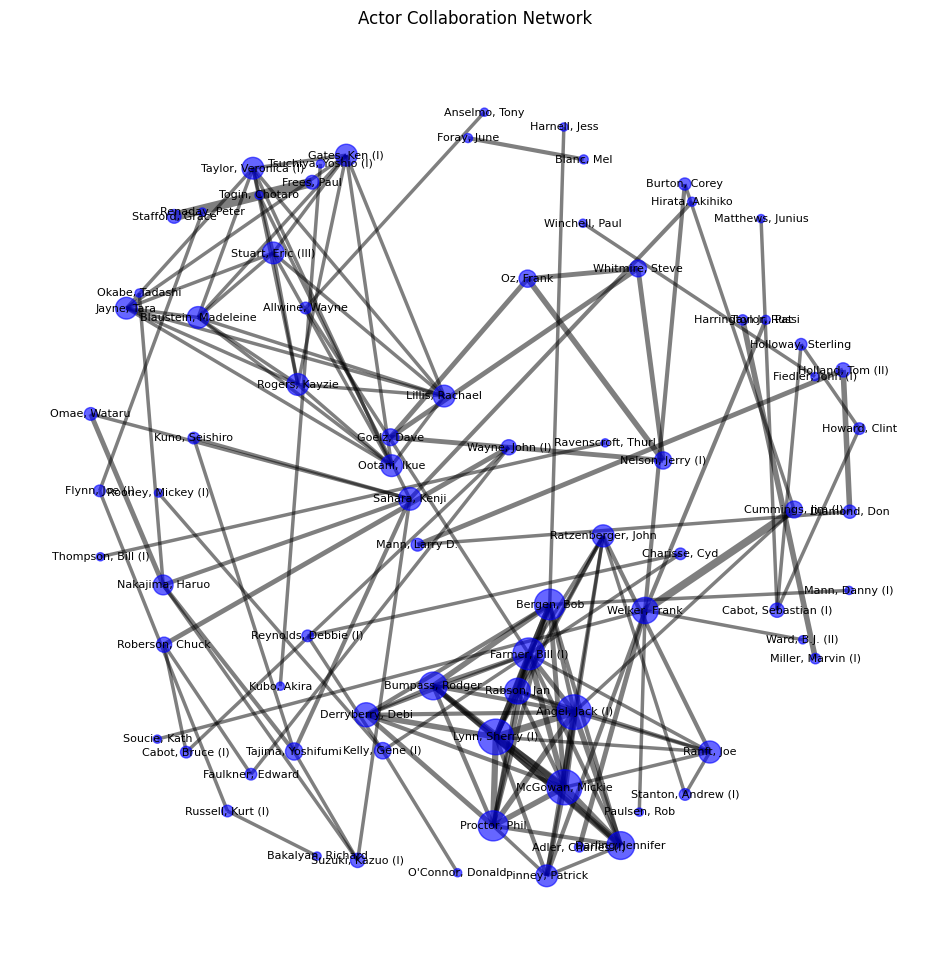

In [ ]:
movieGraph = nx.Graph()
with open('movie-actor.txt', encoding="utf8") as file:
    content = file.readlines()

for row in content:
    cleanRow = row.strip().split('/')
    for actor1, actor2 in combinations(cleanRow[1:], 2):
        if movieGraph.has_edge(actor1, actor2):
            movieGraph[actor1][actor2]['weight'] += 1
        else:
            movieGraph.add_edge(actor1, actor2, weight=1)

for (u, v, d) in list(movieGraph.edges(data=True)):
    if d['weight'] < 5:
        movieGraph.remove_edge(u, v)

movieGraph.remove_nodes_from(list(nx.isolates(movieGraph)))

pos = nx.spring_layout(movieGraph, k = 1.7)

degree_dict = dict(movieGraph.degree(weight='weight'))
for node in movieGraph.nodes():
    movieGraph.nodes[node]['size'] = degree_dict.get(node, 0) * 7

plt.figure(figsize=(12, 12))
sizes = [node[1]['size'] for node in movieGraph.nodes(data=True)]
edges = nx.draw_networkx_edges(movieGraph, pos, alpha=0.5,
                               width=[d['weight'] * 0.5 for u, v, d in movieGraph.edges(data=True)])
nodes = nx.draw_networkx_nodes(movieGraph, pos, node_size=sizes, node_color='blue', alpha=0.6)
labels = nx.draw_networkx_labels(movieGraph, pos, font_size=8)

plt.title('Actor Collaboration Network')
plt.axis('off')
plt.show()

The size of each node is connected to the total number of collaborations an actor has and the weight of the edges is connected to the number of movies two actors have appeared in together.

In [ ]:
print(movieGraph.number_of_nodes())

79


In [ ]:
print(movieGraph.number_of_edges())

147


In [ ]:
degrees = [degree for node, degree in movieGraph.degree]
print("Average Degree", np.mean(degrees))

Average Degree 3.721518987341772


In [ ]:
nx.degree_centrality(movieGraph)

{'Welker, Frank': 0.10256410256410256,
 'Rooney, Mickey (I)': 0.01282051282051282,
 'Nelson, Jerry (I)': 0.038461538461538464,
 'Oz, Frank': 0.038461538461538464,
 'Whitmire, Steve': 0.038461538461538464,
 'Goelz, Dave': 0.038461538461538464,
 'Taylor, Russi': 0.01282051282051282,
 'Adler, Charles (I)': 0.01282051282051282,
 'Proctor, Phil': 0.1282051282051282,
 'Cummings, Jim (I)': 0.038461538461538464,
 'Pinney, Patrick': 0.07692307692307693,
 'Angel, Jack (I)': 0.16666666666666666,
 'Burton, Corey': 0.02564102564102564,
 'Derryberry, Debi': 0.08974358974358974,
 'Lynn, Sherry (I)': 0.15384615384615385,
 'Darling, Jennifer': 0.10256410256410256,
 'McGowan, Mickie': 0.15384615384615385,
 'Ravenscroft, Thurl': 0.01282051282051282,
 'Thompson, Bill (I)': 0.01282051282051282,
 'Holloway, Sterling': 0.02564102564102564,
 'Mann, Larry D.': 0.02564102564102564,
 'Renaday, Peter': 0.01282051282051282,
 'Ratzenberger, John': 0.08974358974358974,
 'Winchell, Paul': 0.01282051282051282,
 'Mann,

In [ ]:
sorted_degrees = sorted(((value,key) for (key,value) in nx.degree_centrality(movieGraph).items()), reverse=True)

pd.DataFrame(sorted_degrees, columns = ['Centrality', 'Actor']).head()

,Centrality,Actor
0,0.166667,"Angel, Jack (I)"
1,0.153846,"McGowan, Mickie"
2,0.153846,"Lynn, Sherry (I)"
3,0.153846,"Farmer, Bill (I)"
4,0.141026,"Bergen, Bob"


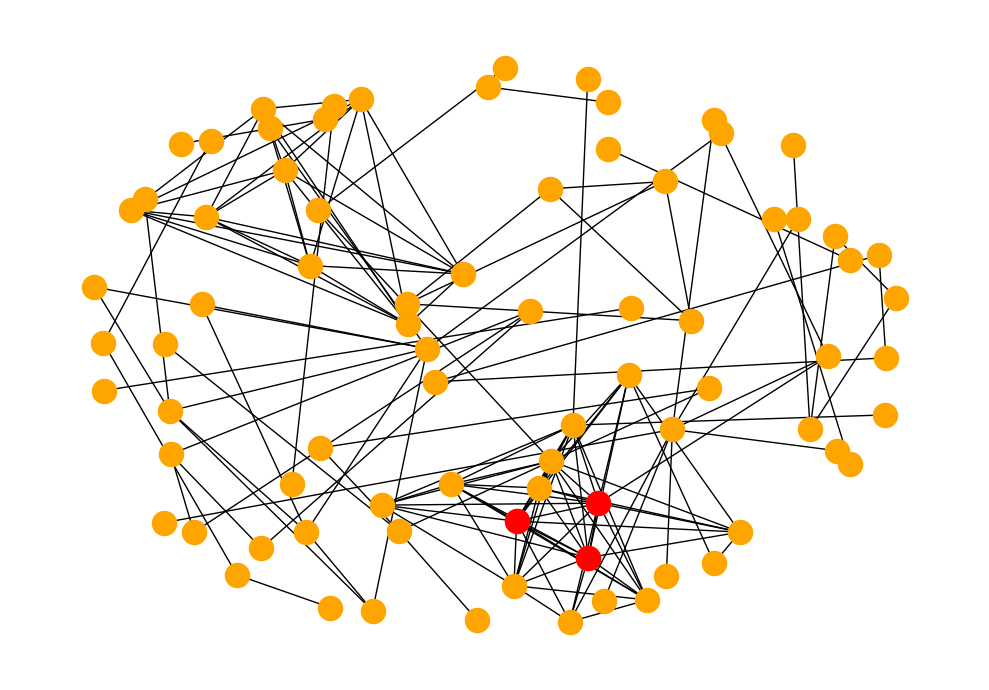

In [ ]:
plt.figure(figsize =(10, 7))
nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['Angel, Jack (I)','McGowan, Mickie','Lynn, Sherry (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

In [ ]:
nx.closeness_centrality(movieGraph)

{'Welker, Frank': 0.13354700854700857,
 'Rooney, Mickey (I)': 0.0293040293040293,
 'Nelson, Jerry (I)': 0.038461538461538464,
 'Oz, Frank': 0.038461538461538464,
 'Whitmire, Steve': 0.038461538461538464,
 'Goelz, Dave': 0.038461538461538464,
 'Taylor, Russi': 0.0953907203907204,
 'Adler, Charles (I)': 0.0953907203907204,
 'Proctor, Phil': 0.1669337606837607,
 'Cummings, Jim (I)': 0.15118529269472666,
 'Pinney, Patrick': 0.16025641025641027,
 'Angel, Jack (I)': 0.18634466308884917,
 'Burton, Corey': 0.11446886446886448,
 'Derryberry, Debi': 0.1405757984705353,
 'Lynn, Sherry (I)': 0.1780626780626781,
 'Darling, Jennifer': 0.16025641025641027,
 'McGowan, Mickie': 0.1780626780626781,
 'Ravenscroft, Thurl': 0.01282051282051282,
 'Thompson, Bill (I)': 0.01282051282051282,
 'Holloway, Sterling': 0.028846153846153848,
 'Mann, Larry D.': 0.02564102564102564,
 'Renaday, Peter': 0.019230769230769232,
 'Ratzenberger, John': 0.13815207780725022,
 'Winchell, Paul': 0.01282051282051282,
 'Mann, Dann

In [ ]:
sorted_degrees = sorted(((value,key) for (key,value) in nx.closeness_centrality(movieGraph).items()), reverse=True)

pd.DataFrame(sorted_degrees, columns = ['Centrality', 'Actor']).head()

,Centrality,Actor
0,0.186345,"Angel, Jack (I)"
1,0.178063,"McGowan, Mickie"
2,0.178063,"Lynn, Sherry (I)"
3,0.166934,"Proctor, Phil"
4,0.160256,"Pinney, Patrick"


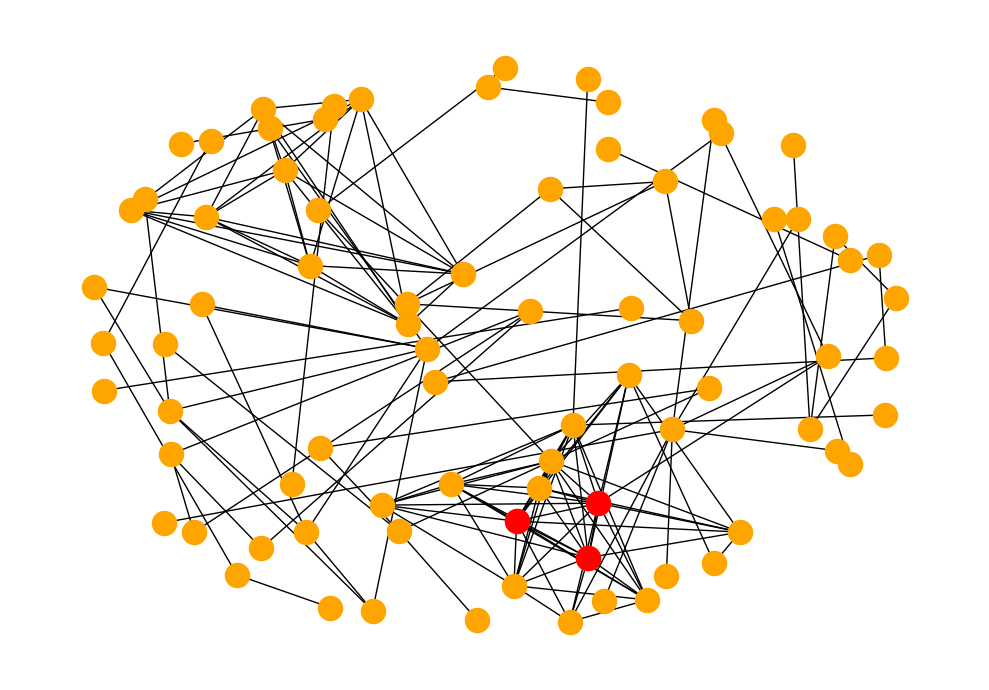

In [ ]:
plt.figure(figsize =(10, 7))
nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['Angel, Jack (I)','McGowan, Mickie', 'Lynn, Sherry (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

In [ ]:
nx.betweenness_centrality(movieGraph)

{'Welker, Frank': 0.03779553779553779,
 'Rooney, Mickey (I)': 0.0,
 'Nelson, Jerry (I)': 0.0,
 'Oz, Frank': 0.0,
 'Whitmire, Steve': 0.0,
 'Goelz, Dave': 0.0,
 'Taylor, Russi': 0.0,
 'Adler, Charles (I)': 0.0,
 'Proctor, Phil': 0.0039056181913324764,
 'Cummings, Jim (I)': 0.010622710622710627,
 'Pinney, Patrick': 0.029004329004329008,
 'Angel, Jack (I)': 0.022020836306550592,
 'Burton, Corey': 0.0,
 'Derryberry, Debi': 0.0,
 'Lynn, Sherry (I)': 0.007235621521335809,
 'Darling, Jennifer': 0.0027972027972027963,
 'McGowan, Mickie': 0.007235621521335809,
 'Ravenscroft, Thurl': 0.0,
 'Thompson, Bill (I)': 0.0,
 'Holloway, Sterling': 0.0,
 'Mann, Larry D.': 0.0,
 'Renaday, Peter': 0.0,
 'Ratzenberger, John': 0.0038295038295038295,
 'Winchell, Paul': 0.0,
 'Mann, Danny (I)': 0.0,
 'Soucie, Kath': 0.0,
 'Flynn, Joe (I)': 0.000666000666000666,
 'Russell, Kurt (I)': 0.000666000666000666,
 'Faulkner, Edward': 0.0,
 'Harrington Jr., Pat': 0.0,
 'Miller, Marvin (I)': 0.0,
 'Farmer, Bill (I)': 0.01

In [ ]:
sorted_degrees = sorted(((value,key) for (key,value) in nx.betweenness_centrality(movieGraph).items()), reverse=True)

pd.DataFrame(sorted_degrees, columns = ['Centrality', 'Actor']).head()

,Centrality,Actor
0,0.037796,"Welker, Frank"
1,0.029004,"Pinney, Patrick"
2,0.022021,"Angel, Jack (I)"
3,0.016959,"Farmer, Bill (I)"
4,0.015794,"Bergen, Bob"


In [ ]:
sorted_degrees = sorted(((value,key) for (key,value) in nx.clustering(movieGraph).items()), reverse=True)

pd.DataFrame(sorted_degrees, columns = ['Centrality', 'Actor']).head(30)

,Centrality,Actor
0,1.000000,"Whitmire, Steve"
1,1.000000,"Taylor, Veronica (I)"
2,1.000000,"Suzuki, Kazuo (I)"
3,1.000000,"Stuart, Eric (III)"
4,1.000000,"Stanton, Andrew (I)"
5,1.000000,"Rogers, Kayzie"
6,1.000000,"Reynolds, Debbie (I)"
7,1.000000,"Oz, Frank"
8,1.000000,"Ootani, Ikue"
9,1.000000,"Omae, Wataru"


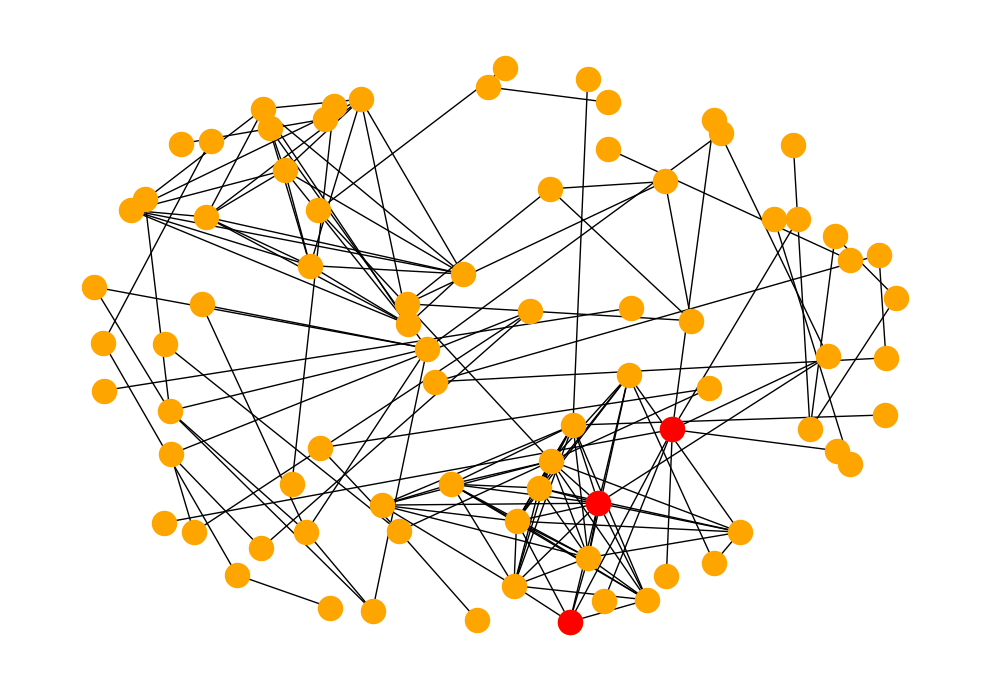

In [ ]:
plt.figure(figsize =(10, 7))
nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['Welker, Frank','Pinney, Patrick','Angel, Jack (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

In [ ]:
df = pd.DataFrame(index=movieGraph.nodes())

df['degree'] = pd.Series(dict(movieGraph.degree()))
df['clustering'] = round(pd.Series(nx.clustering(movieGraph)), 2)
df['degree centrality'] = pd.Series(nx.degree_centrality(movieGraph))
df['closeness centrality'] = round(pd.Series(nx.closeness_centrality(movieGraph)), 2)
df['betweenness centrality'] = round(pd.Series(nx.betweenness_centrality(movieGraph, normalized=True)), 2)

df

,degree,clustering,degree centrality,closeness centrality,betweenness centrality
"Welker, Frank",8,0.04,0.102564,0.13,0.04
"Rooney, Mickey (I)",1,0.00,0.012821,0.03,0.00
"Nelson, Jerry (I)",3,1.00,0.038462,0.04,0.00
"Oz, Frank",3,1.00,0.038462,0.04,0.00
"Whitmire, Steve",3,1.00,0.038462,0.04,0.00
...,...,...,...,...,...
"Lillis, Rachael",7,1.00,0.089744,0.09,0.00
"Taylor, Veronica (I)",7,1.00,0.089744,0.09,0.00
"Rogers, Kayzie",7,1.00,0.089744,0.09,0.00
"Jayne, Tara",7,1.00,0.089744,0.09,0.00


In [ ]:
maximalCliqueList = []
cliquesList = list(nx.find_cliques(movieGraph))
for clique in cliquesList:
    if len(clique)>3:
        maximalCliqueList = clique
        print(clique)

edge_cliquesList = [edge for edge in movieGraph.edges(data=True) if (edge[0] in maximalCliqueList) and (edge[1] in maximalCliqueList)]
edge_cliquesList

['Stuart, Eric (III)', 'Lillis, Rachael', 'Jayne, Tara', 'Taylor, Veronica (I)', 'Rogers, Kayzie', 'Blaustein, Madeleine', 'Gates, Ken (I)', 'Ootani, Ikue']
['Nelson, Jerry (I)', 'Oz, Frank', 'Goelz, Dave', 'Whitmire, Steve']
['Suzuki, Kazuo (I)', 'Sahara, Kenji', 'Nakajima, Haruo', 'Tajima, Yoshifumi']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Pinney, Patrick', 'Darling, Jennifer', 'Proctor, Phil']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bergen, Bob', 'Proctor, Phil', 'Bumpass, Rodger', 'Darling, Jennifer']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bergen, Bob', 'Proctor, Phil', 'Bumpass, Rodger', 'Rabson, Jan']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bergen, Bob', 'Proctor, Phil', 'Bumpass, Rodger', 'Derryberry, Debi']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Ranft, Joe', 'Rabson, Jan', 'Ratzenberger, John']


[('Angel, Jack (I)', 'Lynn, Sherry (I)', {'weight': 10}),
 ('Angel, Jack (I)', 'McGowan, Mickie', {'weight': 11}),
 ('Angel, Jack (I)', 'Farmer, Bill (I)', {'weight': 7}),
 ('Angel, Jack (I)', 'Ranft, Joe', {'weight': 5}),
 ('Angel, Jack (I)', 'Rabson, Jan', {'weight': 6}),
 ('Angel, Jack (I)', 'Ratzenberger, John', {'weight': 5}),
 ('Lynn, Sherry (I)', 'McGowan, Mickie', {'weight': 11}),
 ('Lynn, Sherry (I)', 'Farmer, Bill (I)', {'weight': 8}),
 ('Lynn, Sherry (I)', 'Ranft, Joe', {'weight': 5}),
 ('Lynn, Sherry (I)', 'Rabson, Jan', {'weight': 6}),
 ('Lynn, Sherry (I)', 'Ratzenberger, John', {'weight': 5}),
 ('McGowan, Mickie', 'Farmer, Bill (I)', {'weight': 8}),
 ('McGowan, Mickie', 'Ranft, Joe', {'weight': 5}),
 ('McGowan, Mickie', 'Rabson, Jan', {'weight': 6}),
 ('McGowan, Mickie', 'Ratzenberger, John', {'weight': 5}),
 ('Ratzenberger, John', 'Farmer, Bill (I)', {'weight': 5}),
 ('Ratzenberger, John', 'Ranft, Joe', {'weight': 6}),
 ('Ratzenberger, John', 'Rabson, Jan', {'weight': 5}

In [ ]:
CommNeighbor = {}
JaccardCoef = {}

for u, v in nx.non_edges(movieGraph):
    CommNeighbor[(u, v)] = len(list(nx.common_neighbors(movieGraph, u, v)))

for u, v, p in nx.jaccard_coefficient(movieGraph):
    JaccardCoef[(u, v)] = p

df_coeff = pd.DataFrame(list(JaccardCoef.items()), columns=['Group', 'Jaccard Coefficient'])
df_coeff['Common Neighbor'] = df_coeff['Group'].map(CommNeighbor)

df_coeff.set_index('Group', inplace=True)

df_coeff.sort_values(by='Jaccard Coefficient', ascending=False, inplace=True)

df_coeff.head(20)

,Jaccard Coefficient,Common Neighbor
Group,,
"(Togin, Chotaro, Hirata, Akihiko)",1.000000,1
"(Harnell, Jess, Mann, Danny (I))",1.000000,1
"(Paulsen, Rob, Soucie, Kath)",1.000000,1
"(Paulsen, Rob, Ward, B.J. (II))",1.000000,1
"(Ward, B.J. (II), Soucie, Kath)",1.000000,1
"(Adler, Charles (I), Ward, B.J. (II))",1.000000,1
"(Cabot, Bruce (I), Faulkner, Edward)",1.000000,2
"(Taylor, Russi, Ward, B.J. (II))",1.000000,1
"(Taylor, Russi, Paulsen, Rob)",1.000000,1


#Findings and interpretations
The analysis of centrality measures which included the relationships actors from movies who have at acted in at least 5 movies together, clustering coefficients, and cliques in this network provide some insights into the structure of the relationships of actors within the film industry.

**Centrality measures**:

**Degree centrality**: Jack Angel, Mickie McGown, Sherry Lynn, and Bill Farmer show high degree centralities, suggesting that they have collaborated with a broad range of actors within the network. This highlights their involvement in various projects showing that they most likely had diverse and successful careers.

**Closeness centrality**: Jack Angel leads in closeness centrality which is similar to degree centrality showing how close he is to all other nodes in the network. This shorter path between him and other actors in the network shows that he can contribute to facilitating faster and broader collaboration potential when it would come to making new movies.

**Betweenness Centrality**: Frank Welker leads in betweenness centrality showing his role as a bridge within this network. This shows that he could probably be working with actors who do not work together as much, acting as an important link between the diverse groups in the film industry.

**Clustering and Cliques:**

Clustering coefficients: Actors like Steve Whitmire and Frank Oz show perfect clustering coefficients showing that they probably work frequently in tightly-knit groups which would consist of specific groups of actors who would appear in films together.

**Cliques**: The cliques of 3 actors such as Jack Angel, Shery Lynn, and Mickie McGowan further show these tight-knit groups who collaborate with each other on films. Each of these cliques could represent specific project such as a movie franchise or preferred collaboration groups who work togther often.

**Jaccard coefficient and common neighbors**: Groups with a high Jaccard coefficients such as Togin, Chotaro, Hirata, and Akihiko probably operate in similar environments within the network and could potentially be great candidates for any collaborations. The high Jaccard scores along with many common neighbors such as Derryberry, Debi, Darling, and Jennifer could be used to identify different genres within the network or communities as well.

This analysis shows that actors with high centrality in one area usually score high across the others indicating a strong and influential presence in the network like Jack Angel. Also, the presence of cliques along with the high clustering coefficients throughout this network show that there are recurring collaborations that occur between actors showing the possibilities of different segment formations in the industry or the strategic formations of certain groups of actors.